In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
FILE = 'packet_breakdown.txt' # arquivo de interesse
colunas = ['InterfModel,node',
           'Failed, buffer overflow',
           'Failed, busy channel',
           'Failed, no ack',
           'Success, first try',
           'Success, not first try']

# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

In [3]:
def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

def obter_interfmodel(item):
    interfModel = item[12]
    return interfModel

def obter_node(item):
    node = item[19]
    return node

In [4]:
# Data Frame com todos os dados.
DATA = pd.DataFrame()

# captura dos dados 
for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['InterfModel'] = dfPRR['InterfModel,node'].apply(obter_interfmodel)
        dfPRR['node'] = dfPRR['InterfModel,node'].apply(obter_node)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


In [5]:
col = ['Failed, buffer overflow',
       'Failed, busy channel',
       'Failed, no ack',
       'Success, first try',
       'Success, not first try']

DATA['total packets'] = DATA[col].sum(axis=1)
DATA['buffer overflow rate'] = DATA['Failed, buffer overflow'] / DATA['total packets']
DATA['busy channel rate'] = DATA['Failed, busy channel'] / DATA['total packets']
DATA['no ack rate'] = DATA['Failed, no ack'] / DATA['total packets']

DATA['sucess rate, first try'] = DATA['Success, first try'] / DATA['total packets']
DATA['sucess rate, not first try'] = DATA['Success, not first try'] / DATA['total packets']

In [6]:
DATA.sample(5)

,"InterfModel,node","Failed, buffer overflow","Failed, busy channel","Failed, no ack","Success, first try","Success, not first try",InterfModel,node,simulacao,total packets,buffer overflow rate,busy channel rate,no ack rate,"sucess rate, first try","sucess rate, not first try"
70,"InterfModel=2,node=1",0.00,18.73,237.77,1928.75,811.91,2,1,p=0.3,2997.16,0.000000,0.006249,0.079332,0.643526,0.270893
155,"InterfModel=1,node=1",0.00,19.81,80.33,2068.66,828.68,1,1,p=0.9,2997.48,0.000000,0.006609,0.026799,0.690133,0.276459
93,"InterfModel=0,node=4",1512.25,15.94,96.45,4710.64,1132.73,0,4,p=0.5,7468.01,0.202497,0.002134,0.012915,0.630776,0.151678
11,"InterfModel=2,node=2",0.00,104.79,23.55,2374.02,495.49,2,2,PA,2997.85,0.000000,0.034955,0.007856,0.791908,0.165282
163,"InterfModel=2,node=4",1740.36,17.18,65.78,4602.70,1041.64,2,4,p=0.9,7467.66,0.233053,0.002301,0.008809,0.616351,0.139487


In [21]:
DATA.dtypes

InterfModel,node               object
Failed, buffer overflow       float64
Failed, busy channel          float64
Failed, no ack                float64
Success, first try            float64
Success, not first try        float64
InterfModel                    object
node                           object
simulacao                      object
total packets                 float64
buffer overflow rate          float64
busy channel rate             float64
no ack rate                   float64
sucess rate, first try        float64
sucess rate, not first try    float64
dtype: object

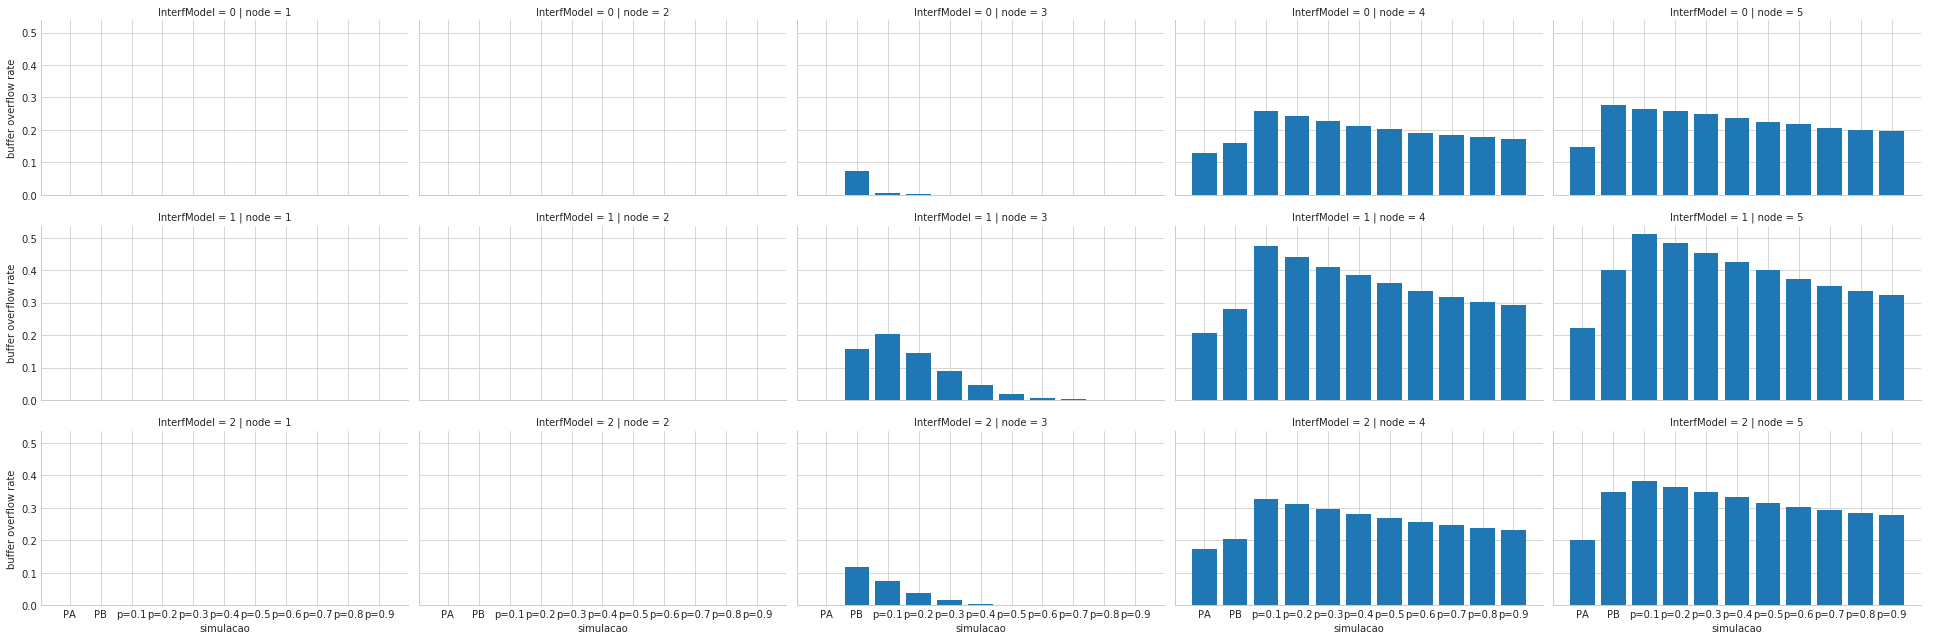

In [7]:
select = True
df = DATA

grid = sns.FacetGrid(df,
                     row="InterfModel",
                     col="node",
                     palette='tab10',
                     legend_out=True,
                     sharex=True,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()

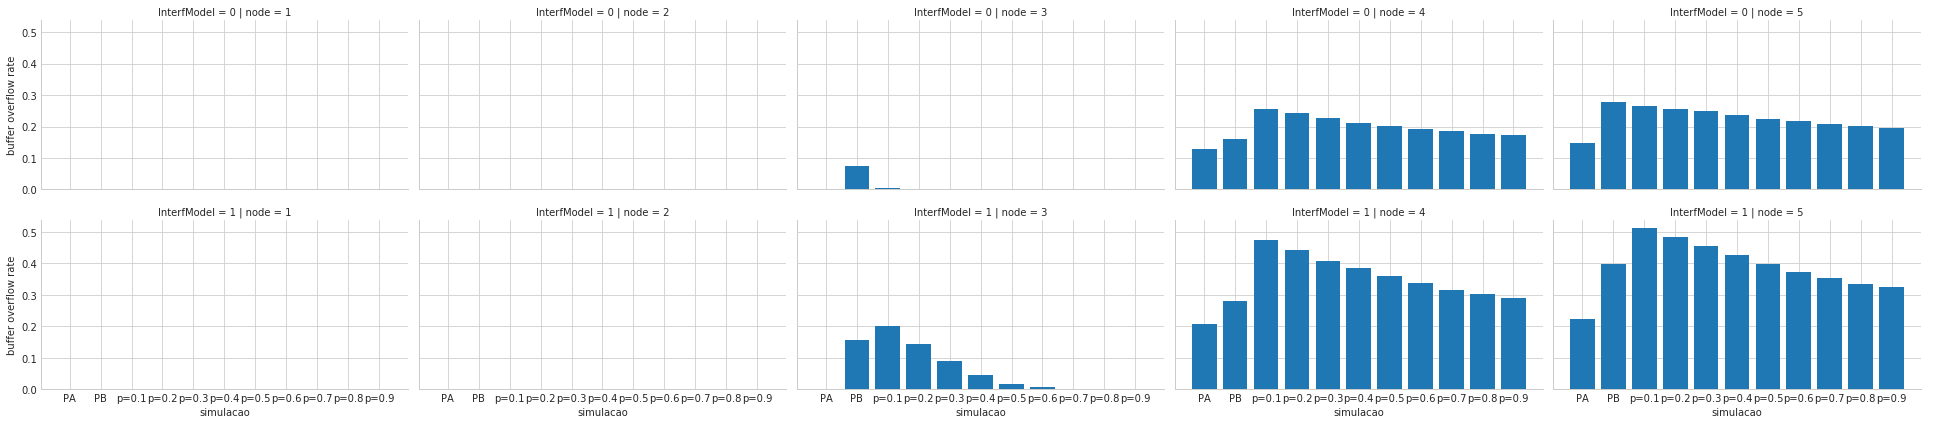

In [8]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]

grid = sns.FacetGrid(df,
                     row="InterfModel",
                     col="node",
                     palette='tab10',
                     legend_out=True,
                     sharex=True,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()

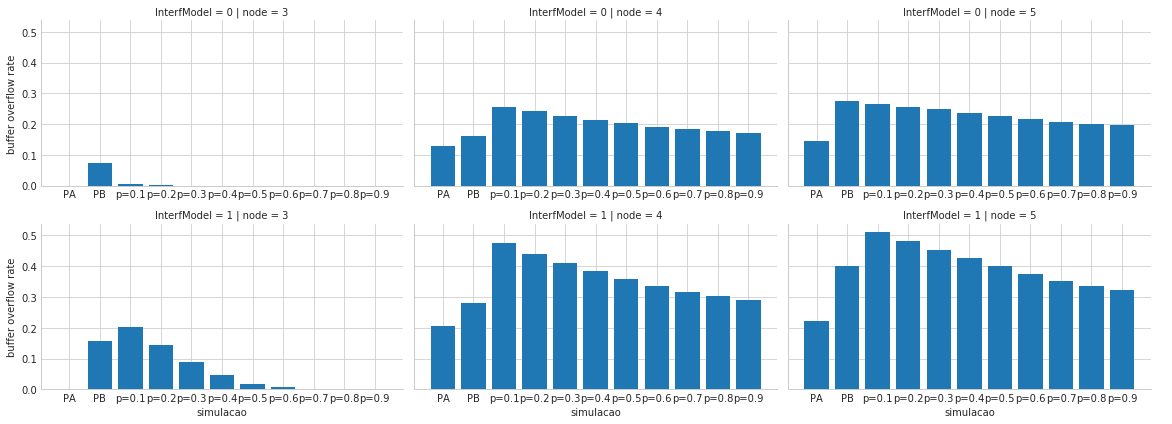

In [9]:
select = (DATA['InterfModel'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' )
# select = (DATA['InterfModel'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['simulacao'] != 'PA') & (DATA['simulacao'] != 'PB')
df = DATA[select]

grid = sns.FacetGrid(df,
                     row="InterfModel",
                     col="node",
                     palette='tab10',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()

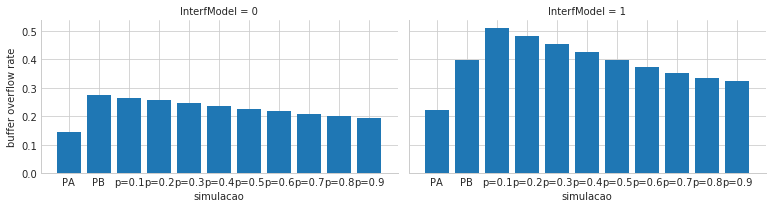

In [10]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]

grid = sns.FacetGrid(df,
                     col="InterfModel",
                     palette='tab10_r',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','buffer overflow rate')
grid.add_legend()

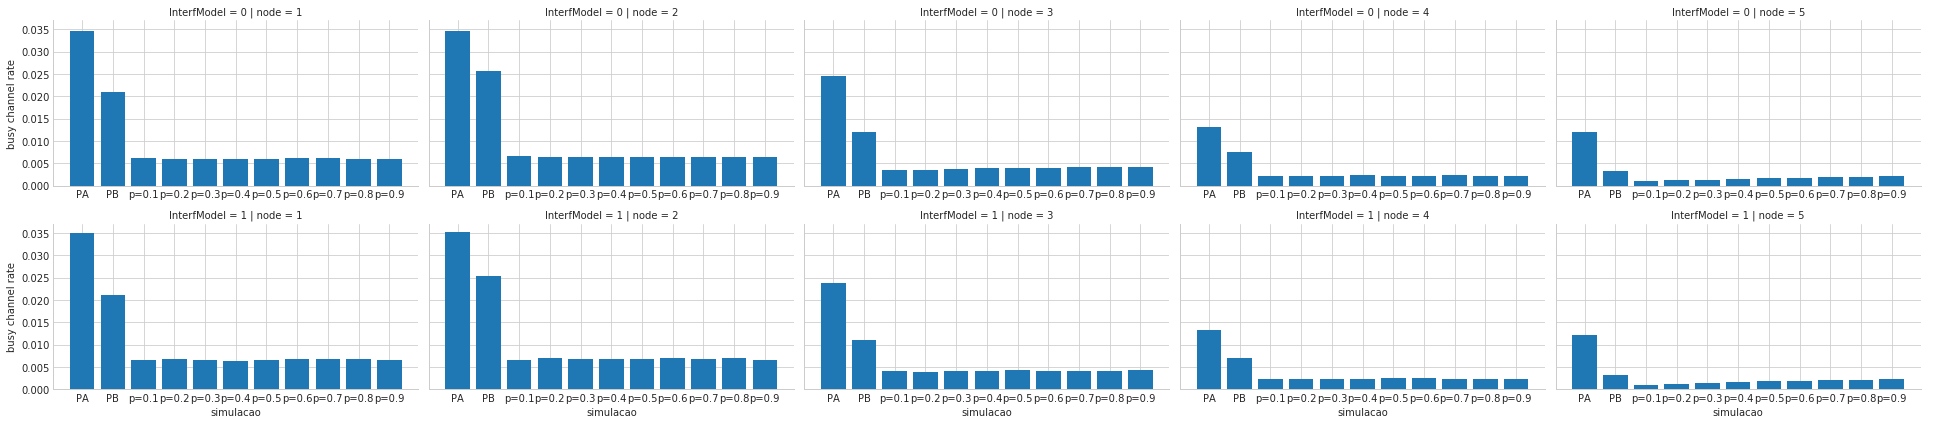

In [23]:
## Gráfico Busy channel Rate
select = (DATA['InterfModel'] != '2' )
df = DATA[select]

grid = sns.FacetGrid(df,
                     row="InterfModel",
                     col="node",
                     palette='tab10_r',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','busy channel rate')
grid.add_legend()

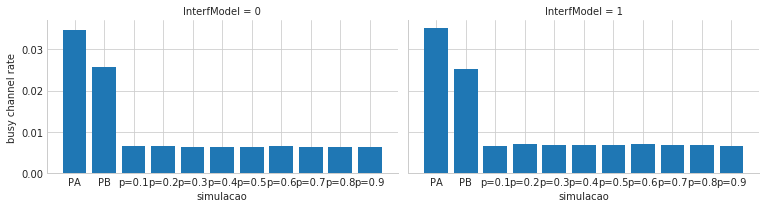

In [12]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]

grid = sns.FacetGrid(df,
                     col="InterfModel",
                     palette='tab10_r',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','busy channel rate')
grid.add_legend()

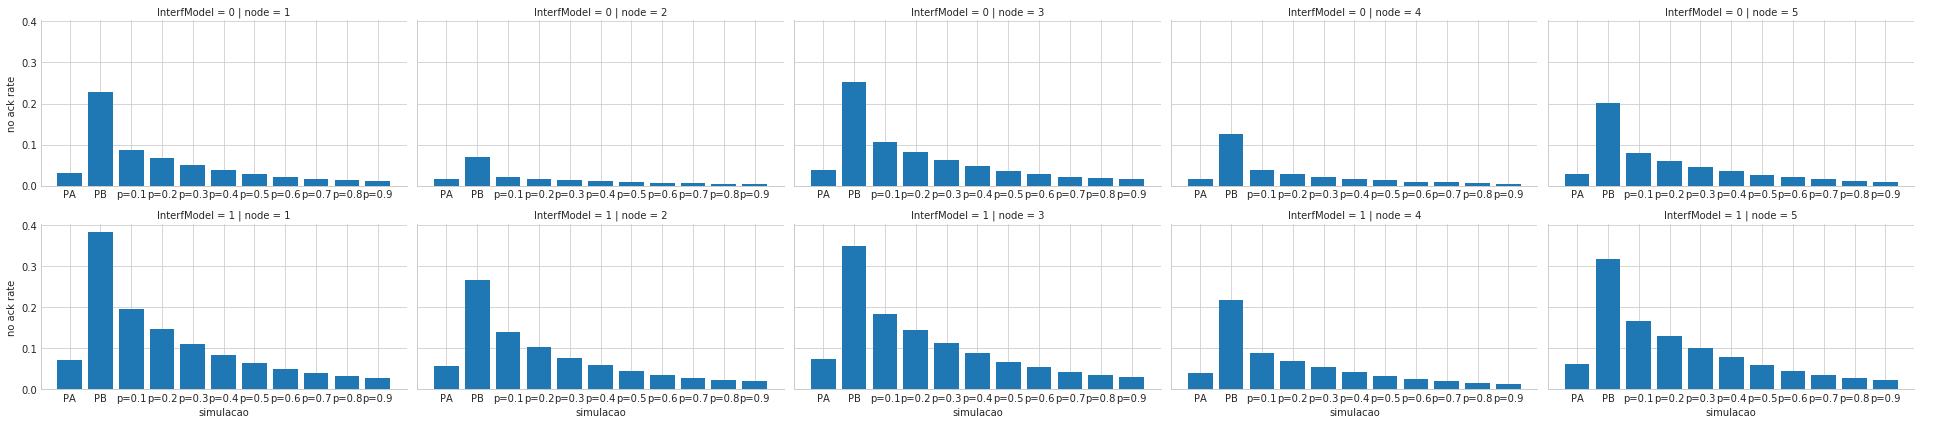

In [24]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]
# df = DATA

grid = sns.FacetGrid(df,
                     row="InterfModel",
                     col="node",
                     palette='tab10_r',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','no ack rate')
grid.add_legend()

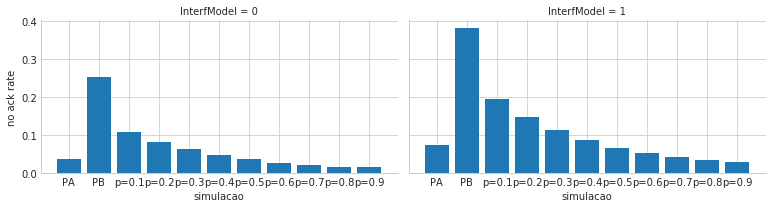

In [14]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]

grid = sns.FacetGrid(df,
                     col="InterfModel",
                     palette='tab10_r',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','no ack rate')
grid.add_legend()

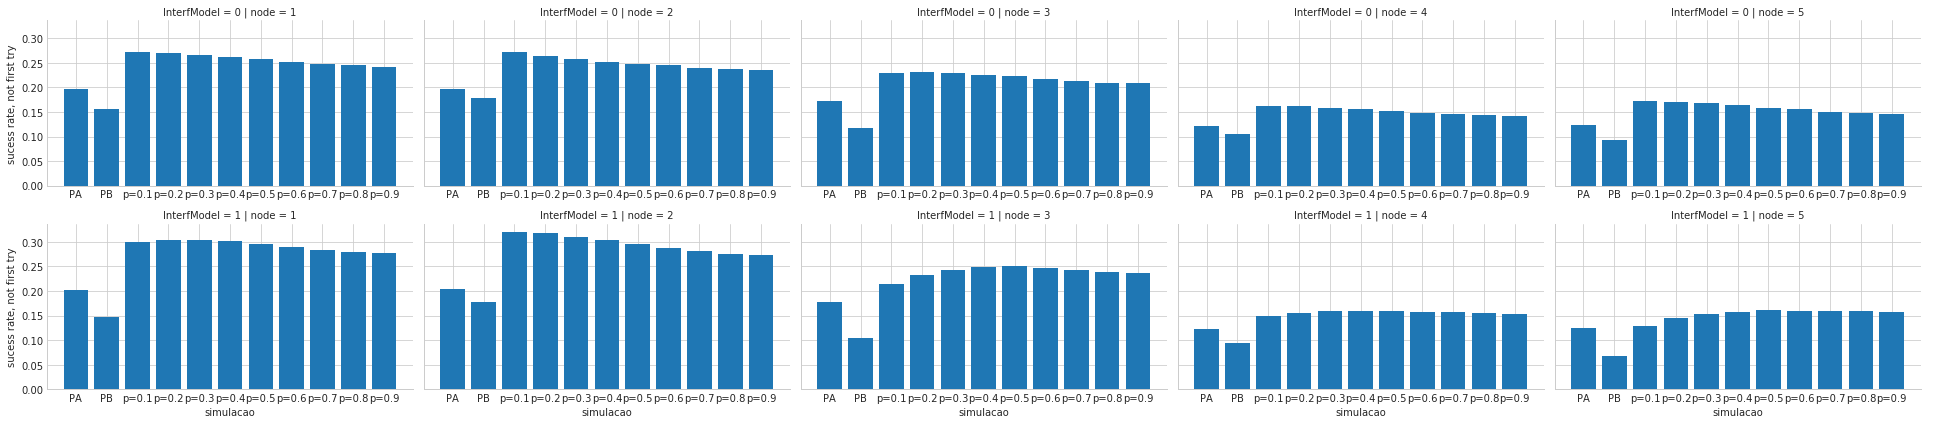

In [28]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]
#df = DATA

grid = sns.FacetGrid(df,
                     row="InterfModel",
                     col="node",
                     palette='tab10_r',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','sucess rate, not first try')
grid.add_legend()

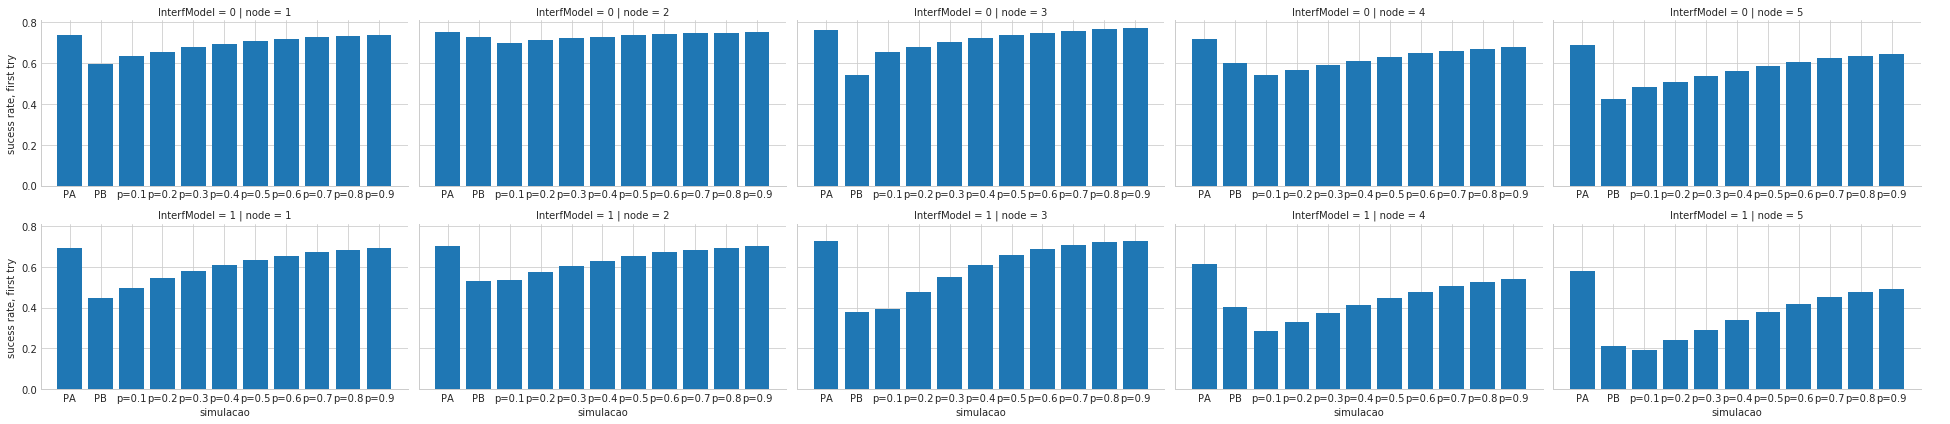

In [29]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]
# df = DATA

grid = sns.FacetGrid(df,
                     row="InterfModel",
                     col="node",
                     palette='tab10_r',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','sucess rate, first try')
grid.add_legend()

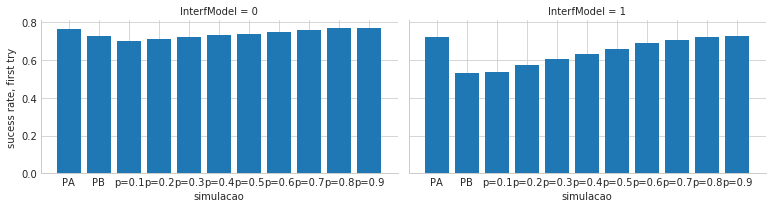

In [17]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]

grid = sns.FacetGrid(df,
                     col="InterfModel",
                     palette='Reds',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','sucess rate, first try')
grid.add_legend()

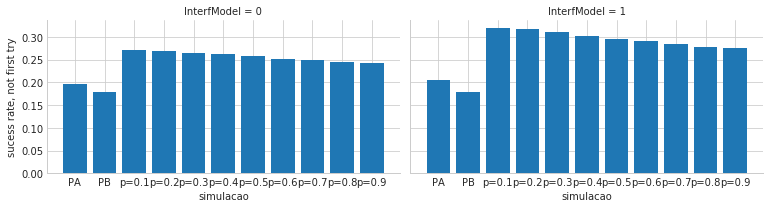

In [27]:
select = (DATA['InterfModel'] != '2')
df = DATA[select]

grid = sns.FacetGrid(df,
                     col="InterfModel",
                     palette='Reds',
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','sucess rate, not first try')
